# REGRESIÓN LINEAL
## DATASET : [kaggle](https://www.kaggle.com/datasets/asinow/car-price-dataset)

# IMPORTAMOS LIBRERIAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# CONFIGURAMOS APARIENCIA DE GRAFICOS

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

# CARGAMOS EL DATASET

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_file = '/content/drive/MyDrive/CODIGO.EDU.PE/CIENCIA DE DATOS/NOTEBOOKS/REPASO_MODULO3_4/car_price_dataset.csv'
cars_df = pd.read_csv(path_file)
cars_df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


# CORRELACIONES

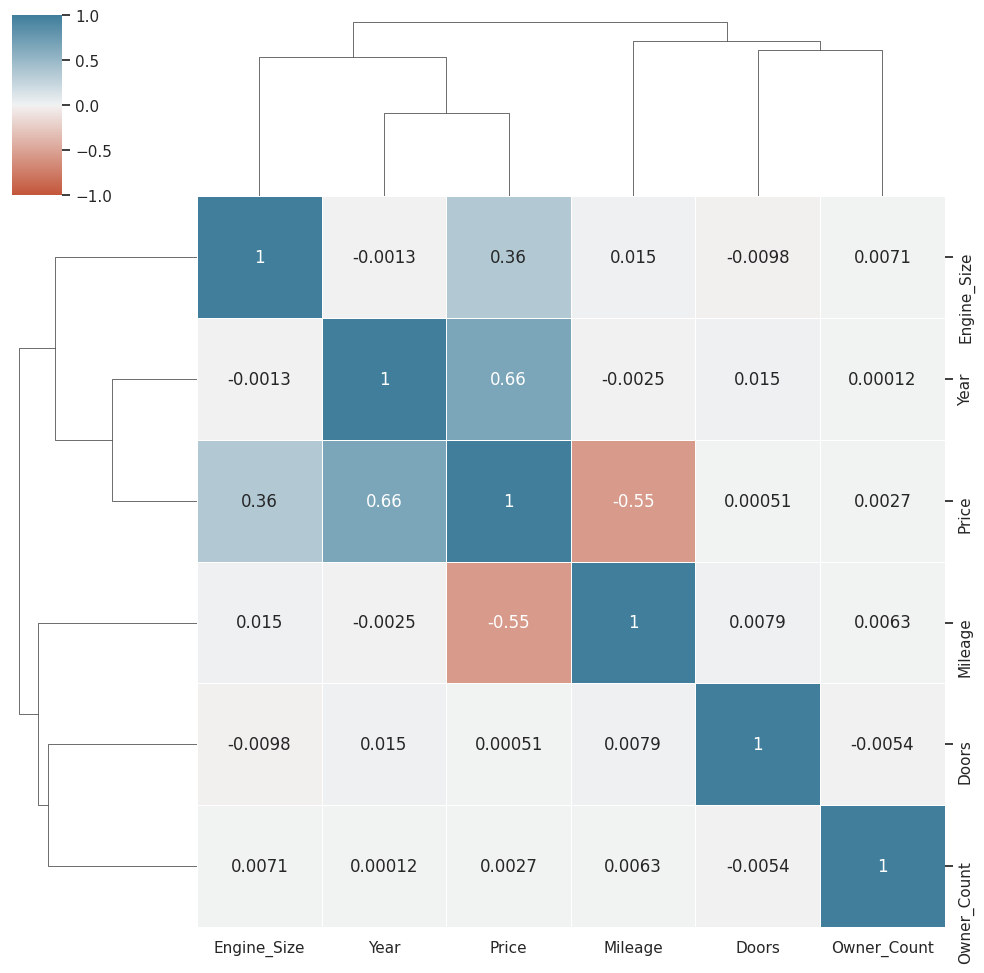

In [6]:
sns.clustermap(
    data=cars_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)


# REGRESIÓN LINEAL SIMPLE

In [7]:
model_1 = (
    smf.ols(
        formula = 'Price ~ Year',
        data=cars_df
    ).fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     7843.
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:28:11   Log-Likelihood:                -91725.
No. Observations:               10000   AIC:                         1.835e+05
Df Residuals:                    9998   BIC:                         1.835e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -5.93e+05   6795.740    -87.259      0.000   -6.06e+05    -5.8e+05
Year         299.1959      3.378     88.563      0.000     292.574     305.818
==============================================================================
Omnibus:                      195.855   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.321
Skew:                           0.064   Prob(JB):                     1.11e-24
Kurtosis:                       2.502   Cond. No.                     5.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# REGRESIÓN LINEAL MULTIPLE

In [8]:
model_2 = (
    smf.ols(
        formula = 'Price ~ Year + Engine_Size + Mileage',
        data=cars_df
    ).fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 2.356e+04
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:29:25   Log-Likelihood:                -84180.
No. Observations:               10000   AIC:                         1.684e+05
Df Residuals:                    9996   BIC:                         1.684e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.922e+05   3196.303   -185.268      0.000   -5.98e+05   -5.86e+05
Year          298.7918      1.589    188.057      0.000     295.677     301.906
Engine_Size   993.0160      9.537    104.128      0.000     974.322    1011.710
Mileage        -0.0200      0.000   -157.648      0.000      -0.020      -0.020
==============================================================================
Omnibus:                      887.286   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.745
Skew:                           0.393   Prob(JB):                    1.22e-106
Kurtosis:                       2.257   Cond. No.                     5.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model_3 = (
    smf.ols(
        formula = 'Price ~ Year + Engine_Size + Mileage + C(Brand) + C(Fuel_Type) + C(Transmission)',
        data=cars_df
    ).fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.742e+05
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:30:32   Log-Likelihood:                -58696.
No. Observations:               10000   AIC:                         1.174e+05
Df Residuals:                    9982   BIC:                         1.176e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -5.916e+05    250.358  -2362.858      0.000   -5.92e+05   -5.91e+05
C(Brand)[T.BMW]                       2.5446      3.804      0.669      0.504      -4.912      10.001
C(Brand)[T.Chevrolet]                 2.0283      3.798      0.534      0.593      -5.416       9.473
C(Brand)[T.Ford]                      3.7969      3.756      1.011      0.312      -3.566      11.160
C(Brand)[T.Honda]                     9.2898      3.793      2.449      0.014       1.855      16.724
C(Brand)[T.Hyundai]                   1.5023      3.806      0.395      0.693      -5.958       8.962
C(Brand)[T.Kia]                       9.7402      3.824      2.547      0.011       2.244      17.237
C(Brand)[T.Mercedes]                  6.7392      3.861      1.745      0.081      -0.829      14.307
C(Brand)[T.Toyota]                    2.5309      3.832      0.661      0.509      -4.980      10.042
C(Brand)[T.Volkswagen]                1.7402      3.782      0.460      0.645      -5.673       9.153
C(Fuel_Type)[T.Electric]           1988.0234      2.394    830.269      0.000    1983.330    1992.717
C(Fuel_Type)[T.Hybrid]              990.4158      2.436    406.580      0.000     985.641     995.191
C(Fuel_Type)[T.Petrol]                1.2401      2.446      0.507      0.612      -3.554       6.035
C(Transmission)[T.Manual]         -1490.2963      2.098   -710.376      0.000   -1494.409   -1486.184
C(Transmission)[T.Semi-Automatic] -1492.0108      2.108   -707.625      0.000   -1496.144   -1487.878
Year                                298.5920      0.124   2400.113      0.000     298.348     298.836
Engine_Size                         992.7185      0.747   1328.994      0.000     991.254     994.183
Mileage                              -0.0199   9.94e-06  -2000.208      0.000      -0.020      -0.020
==============================================================================
Omnibus:                    19670.182   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         38710747.425
Skew:                          15.931   Prob(JB):                         0.00
Kurtosis:                     306.135   Cond. No.                     5.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
summary_table = model_3.summary2().tables[1]
sorted_values = summary_table.sort_values(by='P>|t|',ascending=False)
sorted_values

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
C(Brand)[T.Hyundai],1.502295,3.805783,0.394740,0.693043,-5.957807,8.962397
C(Brand)[T.Volkswagen],1.740165,3.781678,0.460157,0.645414,-5.672686,9.153017
C(Fuel_Type)[T.Petrol],1.240087,2.445878,0.507011,0.612158,-3.554327,6.034501
C(Brand)[T.Chevrolet],2.028298,3.797919,0.534055,0.593315,-5.416388,9.472985
C(Brand)[T.Toyota],2.530886,3.831725,0.660508,0.508943,-4.980068,10.041840
C(Brand)[T.BMW],2.544563,3.803793,0.668954,0.503540,-4.911638,10.000763
C(Brand)[T.Ford],3.796878,3.756157,1.010841,0.312117,-3.565948,11.159703
C(Brand)[T.Mercedes],6.739177,3.860940,1.745476,0.080933,-0.829044,14.307399
C(Brand)[T.Honda],9.289802,3.792806,2.449321,0.014330,1.855137,16.724466
C(Brand)[T.Kia],9.740191,3.824387,2.546863,0.010884,2.243620,17.236761


In [12]:
model_4 = (
    smf.ols(
        formula = 'Price ~ Year + Engine_Size + Mileage + C(Fuel_Type) + C(Transmission)',
        data=cars_df
    ).fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.644e+06
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:33:55   Log-Likelihood:                -58703.
No. Observations:               10000   AIC:                         1.174e+05
Df Residuals:                    9991   BIC:                         1.175e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -5.915e+05    250.264  -2363.688      0.000   -5.92e+05   -5.91e+05
C(Fuel_Type)[T.Electric]           1987.9377      2.394    830.234      0.000    1983.244    1992.631
C(Fuel_Type)[T.Hybrid]              990.3200      2.436    406.597      0.000     985.546     995.094
C(Fuel_Type)[T.Petrol]                1.1438      2.446      0.468      0.640      -3.651       5.938
C(Transmission)[T.Manual]         -1490.2244      2.098   -710.348      0.000   -1494.337   -1486.112
C(Transmission)[T.Semi-Automatic] -1492.0343      2.108   -707.788      0.000   -1496.166   -1487.902
Year                                298.5867      0.124   2400.516      0.000     298.343     298.830
Engine_Size                         992.7311      0.747   1329.796      0.000     991.268     994.194
Mileage                              -0.0199   9.94e-06  -2000.231      0.000      -0.020      -0.020
==============================================================================
Omnibus:                    19695.112   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39024507.314
Skew:                          15.975   Prob(JB):                         0.00
Kurtosis:                     307.365   Cond. No.                     5.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model_5 = (
    smf.ols(
        formula = 'Price ~ Year + Engine_Size + Mileage + C(Transmission)',
        data=cars_df
    ).fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.567e+04
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:34:40   Log-Likelihood:                -81483.
No. Observations:               10000   AIC:                         1.630e+05
Df Residuals:                    9994   BIC:                         1.630e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -5.892e+05   2441.102   -241.362      0.000   -5.94e+05   -5.84e+05
C(Transmission)[T.Manual]         -1496.4892     20.466    -73.119      0.000   -1536.608   -1456.371
C(Transmission)[T.Semi-Automatic] -1509.5462     20.565    -73.404      0.000   -1549.858   -1469.235
Year                                297.8054      1.213    245.437      0.000     295.427     300.184
Engine_Size                         988.0607      7.283    135.668      0.000     973.785    1002.337
Mileage                              -0.0199    9.7e-05   -204.980      0.000      -0.020      -0.020
==============================================================================
Omnibus:                    78933.073   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1176.861
Skew:                           0.441   Prob(JB):                    2.80e-256
Kurtosis:                       1.569   Cond. No.                     5.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# COMPARAMOS LOS MODELOS

In [15]:
model_1_predict = model_1.predict(cars_df)
model_2_predict = model_2.predict(cars_df)
model_3_predict = model_3.predict(cars_df)
model_4_predict = model_4.predict(cars_df)
model_5_predict = model_5.predict(cars_df)

dic_predict= {
    'actual_value':cars_df.Price,
    'model_1_predict':model_1_predict,
    'model_2_predict':model_2_predict,
    'model_3_predict':model_3_predict,
    'model_4_predict':model_4_predict,
    'model_5_predict':model_5_predict,
}

models_result = pd.DataFrame(dic_predict)
models_result

,actual_value,model_1_predict,model_2_predict,model_3_predict,model_4_predict,model_5_predict
0,8501,11383.054673,9754.203862,8516.891853,8511.211133,9267.184387
1,12092,8989.487488,10875.846365,12077.759687,12079.610082,11865.017148
2,11171,11383.054673,10925.281319,11167.858170,11165.100911,11926.714803
3,11780,12280.642367,11047.602963,11772.301690,11776.219154,10550.809996
4,2867,6296.724406,3152.494468,2899.335422,2901.533309,2676.658129
...,...,...,...,...,...,...
9995,8884,6595.920304,10164.871737,8893.218627,8887.493350,9644.023468
9996,6240,5997.528508,4036.465842,6258.753522,6260.675381,5060.814830
9997,9866,8391.095692,9643.732522,9867.381849,9868.746631,10641.089418
9998,4084,5997.528508,2880.040865,4113.803222,4113.952090,3912.325561


# GRAFICAMOS LAS PREDICCIONES

<Axes: ylabel='Proportion'>

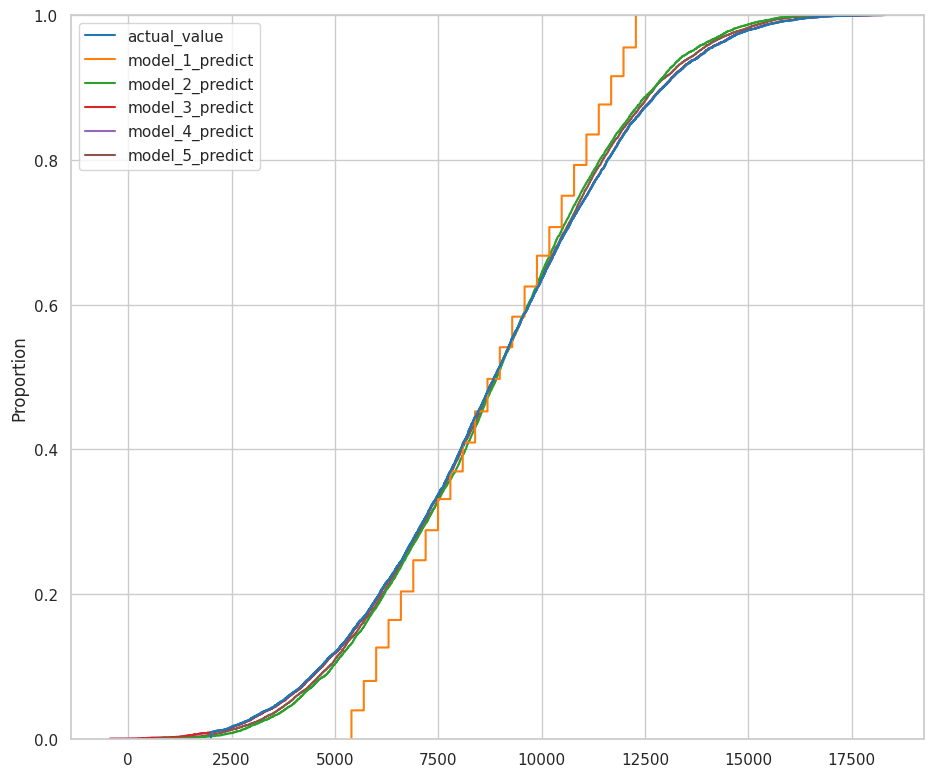

In [16]:
sns.ecdfplot(
    data=models_result
)

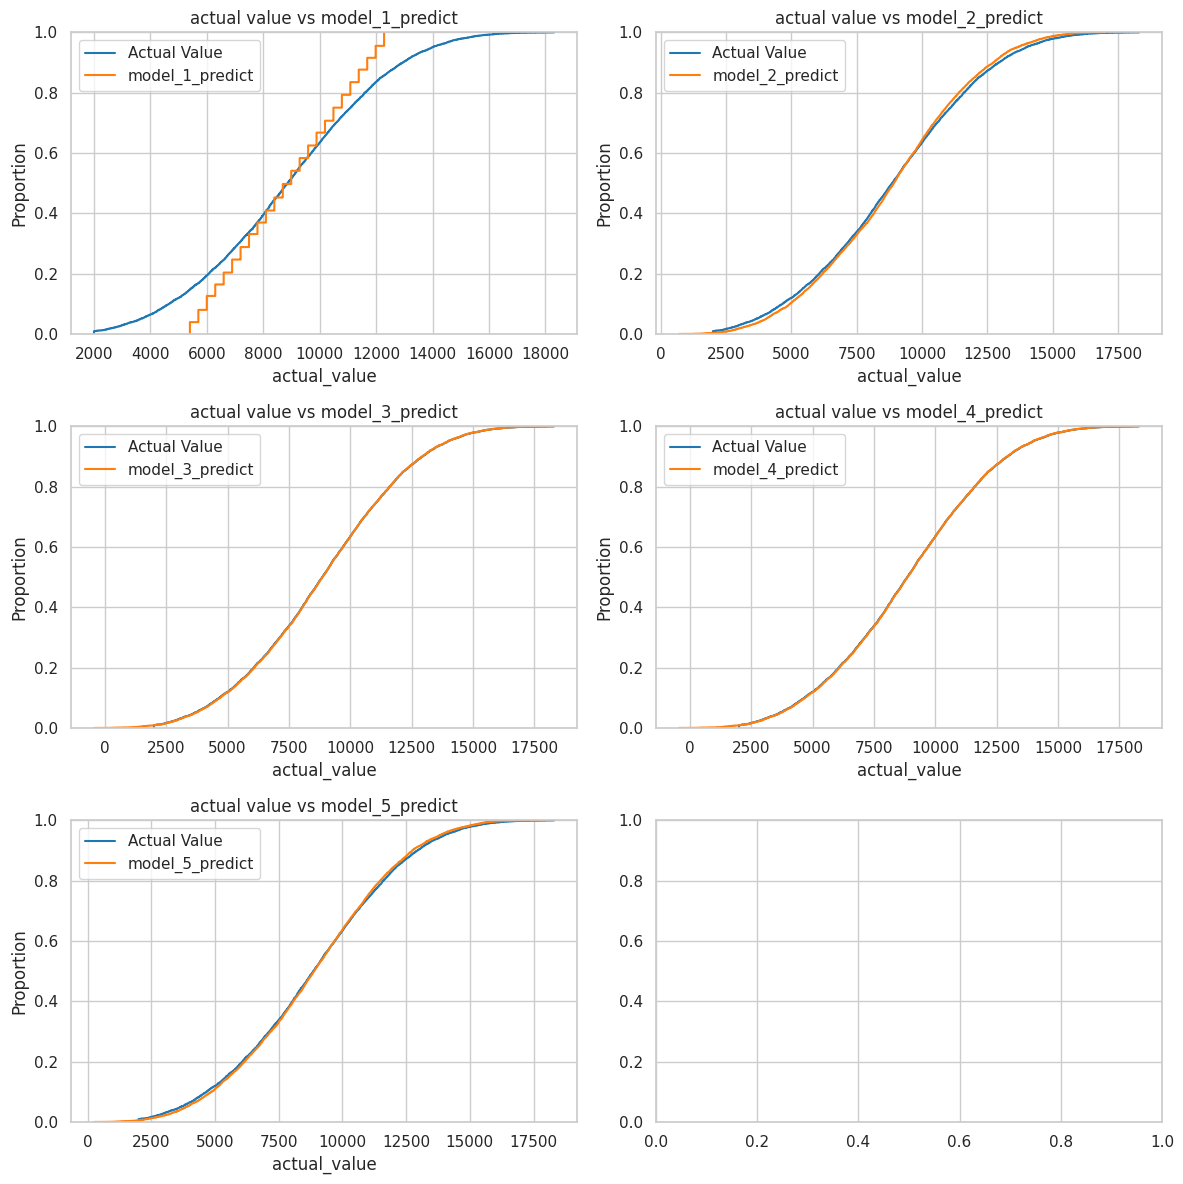

In [19]:
fig,axes = plt.subplots(3,2,figsize=(12,12))
axes = axes.flatten()

for i,col in enumerate(models_result.columns[1:]):
  sns.ecdfplot(models_result['actual_value'],label='Actual Value',ax=axes[i])
  sns.ecdfplot(models_result[col],label=col,ax=axes[i])
  axes[i].legend()
  axes[i].set_title(f'actual value vs {col}')

plt.tight_layout()
plt.show()